# Using Test Set

## Initial Preparation

The models need to be extracted from *Models.zip*. The following code will do so which creates a *Models* folder filled with *.pkl* files that represent the model objects.

In [1]:
import zipfile
import os

# Extract models from zip
if not os.path.exists('Models'):
    
    file_path = 'Models.zip'

    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall()

Custom transformers were built using scikit-learn so these need to be imported.

In [2]:
from Pipelines.custom_transformers import *

## Load Data and Preprocess

The CIFAR-10 dataset will be loaded from TensorFlow.

In [3]:
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

The data can then be preprocessed. Note that the models with PCA are actually a pipeline object that include standard scaling, PCA, and the actual model; they require preprocessing but then natively will execute that additional pipeline.

In [4]:
import joblib

# Load preprocessing pipeline
preprocessing = joblib.load('Pipelines/preprocessing.pkl')
preprocessing

Pipeline(steps=[('dataset_combiner', DatasetCombiner()),
                ('reshaper', Reshaper()), ('splitter', Splitter()),
                ('scaler', Scaler())])

The custom transformers do not expect traditional input. The pipeline expects a tuple of (X_train, X_test, y_train, y_test) as input and will then output the preprocessed tuple (X_train, X_test, y_train, y_test). Note that the *fit* function for all transformers in the pipeline does nothing so *fit_transform* and *transform* are equivalent; the testing dataset is not biased by using *fit_transform* for this specific pipeline.

In [5]:
# Apply preprocessing pipeline
X_train, X_test, y_train, y_test = preprocessing.fit_transform((X_train, X_test, y_train, y_test))

## Evaluate Performance

Performance of the ANN model and best classical models will be evaluated on the test set.

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time

def evaluate(model, X_true, y_true, is_ANN=False):

    """ Evaluate Model Performance """

    # List class names in order
    class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"]

    # Make predictions
    start_time = time.time()
    y_pred = model.predict(X_true)
    if is_ANN:
        y_pred = np.argmax(y_pred, axis=-1)
    end_time = time.time()
    
    # Show prediction time
    pred_time_secs = end_time - start_time
    print(f'Time Taken to Make Prediction: {pred_time_secs} secs')
    print()

    # Precision, Recall, F1-score
    print('Classification Report')
    print(classification_report(y_true, y_pred))
    print()

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

### ANN

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Time Taken to Make Prediction: 0.6886262893676758 secs

Classification Report
              precision    recall  f1-score   support

           0       0.54      0.62      0.58      1200
           1       0.64      0.66      0.65      1200
           2       0.44      0.33      0.38      1200
           3       0.38      0.24      0.30      1200
           4       0.42      0.54      0.47      1200
           5       0.46      0.41      0.43      1200
           6       0.50      0.68      0.57      1200
           7       0.69      0.51      0.59      1200
           8       0.63      0.68      0.66      1200
           9       0.58      0.62      0.60      1200

    accuracy                           0.53     12000
   macro avg       0.53      0.53      0.52     12000
weighted avg       0.53      0.53      0.52     12000


Confusion Matrix


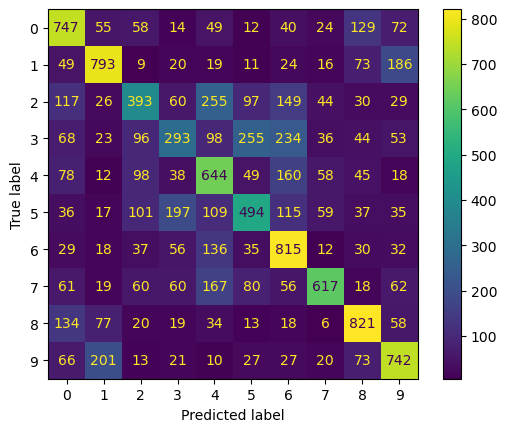

In [7]:
from tensorflow.keras.models import load_model

ANN_model = load_model('Models/ANN.keras')
evaluate(ANN_model, X_test, y_test, is_ANN=True)

### Best Classical Model without Dimensionality Reduction: Random Forest

Time Taken to Make Prediction: 1.5163793563842773 secs

Classification Report
              precision    recall  f1-score   support

           0       0.54      0.53      0.54      1200
           1       0.52      0.57      0.54      1200
           2       0.40      0.31      0.35      1200
           3       0.33      0.27      0.30      1200
           4       0.38      0.39      0.39      1200
           5       0.42      0.38      0.40      1200
           6       0.45      0.58      0.51      1200
           7       0.53      0.47      0.50      1200
           8       0.61      0.61      0.61      1200
           9       0.48      0.59      0.53      1200

    accuracy                           0.47     12000
   macro avg       0.47      0.47      0.47     12000
weighted avg       0.47      0.47      0.47     12000


Confusion Matrix


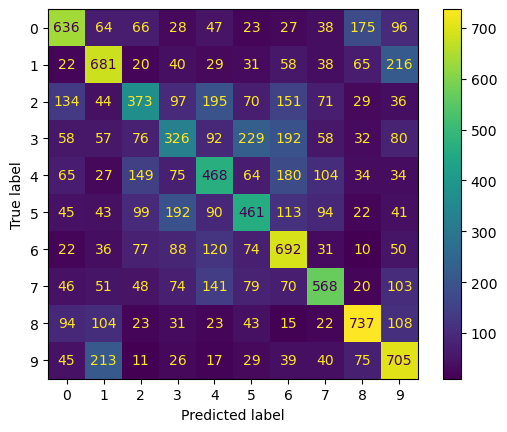

In [8]:
import joblib

rf_raw = joblib.load('Models/random_forest_raw.pkl')
evaluate(rf_raw, X_test, y_test, is_ANN=False)

### Best Classical Model with Dimensionality Reduction: Random Forest with PCA

Time Taken to Make Prediction: 0.7997274398803711 secs

Classification Report
              precision    recall  f1-score   support

           0       0.54      0.55      0.55      1200
           1       0.52      0.61      0.56      1200
           2       0.40      0.30      0.34      1200
           3       0.31      0.24      0.27      1200
           4       0.43      0.38      0.40      1200
           5       0.42      0.39      0.41      1200
           6       0.46      0.58      0.51      1200
           7       0.54      0.47      0.50      1200
           8       0.57      0.64      0.61      1200
           9       0.48      0.57      0.52      1200

    accuracy                           0.47     12000
   macro avg       0.47      0.47      0.47     12000
weighted avg       0.47      0.47      0.47     12000


Confusion Matrix


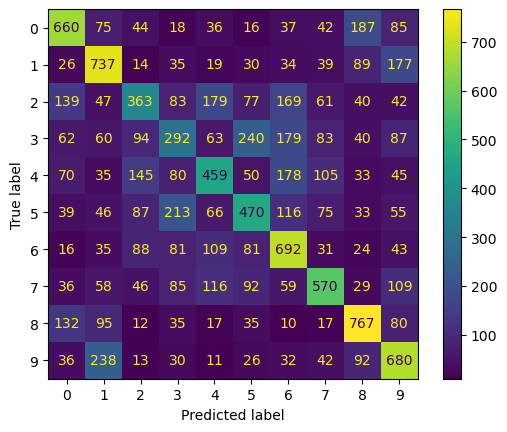

In [9]:
rf_pca = joblib.load('Models/random_forest_pca.pkl')
evaluate(rf_pca, X_test, y_test, is_ANN=False)